In [1]:
import pyscal.crystal_structures as pcs
import pyscal.csystem as pcm
import pyscal.core as pc
from ase import atoms
from ase.io import read, write
from ase.build import bulk
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

In [36]:
atoms, box = pcs.make_crystal(structure="bcc", repetitions=(20,20,20))

In [37]:
sys = pc.System()
sys.box = box
sys.atoms = atoms

In [38]:
%%timeit
sys.find_neighbors(method='voronoi', cutoff=0.1)

5.85 s ± 1.76 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [41]:
%%timeit
sys.find_neighbors(method='voronoi', cutoff=0.1, clean_vertices=False)

7.59 s ± 2.14 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [42]:
%%timeit
vor = Voronoi(sys.positions)

2.66 s ± 394 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [43]:
natoms = [(5**3)*2, (7**3)*2, (10**3)*2, (15**3)*2, (20**3)*2,]
t_voroc = [37, 114, 318, 1031, 5800]
t_voro = [15, 52, 140, 512, 3130]
t_scipy = [12, 41, 169, 636, 2660]

ValueError: Illegal format string "o."; two marker symbols

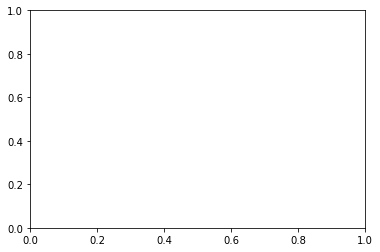

In [45]:
plt.plot(natoms, t_voroc, 'o.', label="pyscal voro+clean")
plt.plot(natoms, t_voro, 'o.', label="pyscal voro")
plt.plot(natoms, t_scipy, 'o.', label="scipy")
plt.xlabel("#atoms")
plt.ylabel("Time (ms)")

In [10]:
def get_distance(x, box, dim=3):
    box_2 = box/2
    xdum = []
    for i in range(dim):
        xd = np.meshgrid(x[i], x[i])[1] - np.meshgrid(x[i], x[i])[0]
        xdum.append(xd)
    xd = np.array(xdum)
    for i in range(dim):
        xd[i] = np.where(xd[i] > box_2[i], xd[i]-box[i], xd[i])
        xd[i] = np.where(xd[i] < -box_2[i], xd[i]+box[i], xd[i])
    return xd

In [12]:
x = sys.atoms['positions']
box = sys.boxdims

In [16]:
x = np.array(x)

In [20]:
y = x.T

In [28]:
%%timeit
xd = get_distance(y, np.array(box))

224 ms ± 857 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
xd.shape

(3, 2000, 2000)

In [23]:
np.where(xd[]

array([[[ 0.    , -1.5635,  0.    , ...,  1.5635,  3.127 ,  1.5635],
        [ 1.5635,  0.    ,  1.5635, ...,  3.127 ,  4.6905,  3.127 ],
        [ 0.    , -1.5635,  0.    , ...,  1.5635,  3.127 ,  1.5635],
        ...,
        [-1.5635, -3.127 , -1.5635, ...,  0.    ,  1.5635,  0.    ],
        [-3.127 , -4.6905, -3.127 , ..., -1.5635,  0.    , -1.5635],
        [-1.5635, -3.127 , -1.5635, ...,  0.    ,  1.5635,  0.    ]],

       [[ 0.    , -1.5635,  0.    , ...,  1.5635,  3.127 ,  1.5635],
        [ 1.5635,  0.    ,  1.5635, ...,  3.127 ,  4.6905,  3.127 ],
        [ 0.    , -1.5635,  0.    , ...,  1.5635,  3.127 ,  1.5635],
        ...,
        [-1.5635, -3.127 , -1.5635, ...,  0.    ,  1.5635,  0.    ],
        [-3.127 , -4.6905, -3.127 , ..., -1.5635,  0.    , -1.5635],
        [-1.5635, -3.127 , -1.5635, ...,  0.    ,  1.5635,  0.    ]],

       [[ 0.    , -1.5635, -3.127 , ...,  4.6905,  3.127 ,  1.5635],
        [ 1.5635,  0.    , -1.5635, ...,  6.254 ,  4.6905,  3.127 ],
    